<a href="https://colab.research.google.com/github/MarcoE25/Clases-Analisis-Datos/blob/main/Clase_5_intermedio_202508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Itinerario de clase

* Índices
* Tablas dinámicas
* Iteración sobre dataframes
* Melt y más

In [ ]:
# PONER EN LA PRIMER CELDA TODAS LAS LIBRERÍAS
import pandas as pd
from dateutil import parser
import datetime as dt
import random as r

# Webscraping
import urllib.request, json
from urllib.request import urlopen
from zipfile import ZipFile
import re

## Resumen de la clase anterior



In [ ]:
################################################################################
############################ CARGA DE LA INFORMACION ###########################
################################################################################
df_bank = pd.read_csv("https://cursopypagina.github.io/CursoPy/Clase_1.csv")
df_bank_ej = pd.read_csv("https://cursopypagina.github.io/CursoPy/Clase_1_5.csv")

df_bank_ej = df_bank_ej.rename(columns={"Fecha_Inicio_Contrato": "Fecha_Inicio"})
df_bank_ej = df_bank_ej[["Nombre_Empresa", "Ejecutivo", "Fecha_Inicio"]]

################################################################################
############################ VALORES DEL USD-EUR ###############################
################################################################################
def divisa_webs(clave):
  url = "https://www.piplatam.com/Home/filiales?country=MX"
  page = urlopen(url)
  htmlBytes = page.read()
  html = htmlBytes.decode("utf-8")
  strValorClave = html.find(clave)
  stringFiltro1 = html[strValorClave:]
  strValor = stringFiltro1.split("dblValue")[1].split("dblChange")[0]
  strValor = re.findall(r"\d+\.\d+", strValor)[0]
  return strValor

usdValor = round(float(divisa_webs("USD-MXN FIX (Banxico)")), 2)
eurValor = round(float(divisa_webs("EUR-MXN")), 2)

################################################################################
########################## LIMPIEZA Y PROCESAMIENTO ############################
################################################################################
def clean_1(df_func, tipo):
  df_func_trabajo = df_func.copy()
  df_func_trabajo['Nombre_Empresa'] = df_func_trabajo['Nombre_Empresa'].str.strip().str.title()
  df_func_trabajo["Fecha_Inicio"] = df_func_trabajo["Fecha_Inicio"].apply(lambda x: parser.parse(x))

  if tipo == "Ejecutivo":
    return df_func_trabajo
  elif tipo == "General":
    df_func_trabajo['Fecha_Fin'] = df_func_trabajo['Fecha_Fin'].fillna('1900-01-01')
    df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].fillna(0)
    df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].astype(int)

    df_func_trabajo['Fecha_Fin'] = df_func_trabajo['Fecha_Fin'].apply(lambda x: parser.parse(x))
    df_func_trabajo['Operacion'] = df_func_trabajo['Operacion'].str.split("-").apply(lambda x: x[1])

    fechaReporte = dt.datetime.today() - dt.timedelta(days = 1)
    fechaReporte = dt.datetime.strftime(fechaReporte, "%Y-%m-%d")
    df_func_trabajo['Fecha_Reporte'] = fechaReporte
    return df_func_trabajo
  else:
    print("⚠️Nombre inválido⚠️")

################################################################################
##################### APLICAMOS LA FUNCION DE LIMPIEZA #########################
################################################################################
df_bank_clean = clean_1(df_bank, "General")
df_bank_clean_ej = clean_1(df_bank_ej, "Ejecutivo")

### Group By

* Se aplica sobre columnas categóricas.
* Y va de la mano con funciones de agregacion: sum(), min(), max(), std(), count().
* La columna de tu groupby será el índice del dataframe resultante.
```python
groupby(columnaCategorica).funcionDeAgregacion()
```

* La función agg nos permite configurar una función de agregación para cada columna de interés.
* Cuando utilizar la función de agregación agg, obtienes en salida columnas multi-índice

In [ ]:
df_bank_clean_ej[['Nombre_Empresa', "Fecha_Inicio"]].groupby("Nombre_Empresa").count().reset_index().head()

,Nombre_Empresa,Fecha_Inicio
0,Alsea,63
1,América Móvil,67
2,Banorte,56
3,Bbva México,57
4,Cemex,61


In [ ]:
df_bank_clean['Monto_Credito'].sum()

np.float64(50775791691.240005)

In [ ]:
def sumaManual(columna):
  return columna.sum()

sumaManual(df_bank_clean['Monto_Credito'])

np.float64(50775791691.240005)

# ⚠️ Función last ⚠️

* [3, 5, 2] ---> 2
* Depende del orden

# ⚠️ Función max ⚠️
* [3, 5, 2] ---> 5
* No depende del orden

---

Son iguales solo si tenemos los datos ordenados de menor a mayor:

# ⚠️ Función last ⚠️

* [2, 3, 5] ---> 5
* Depende del orden

# ⚠️ Función max ⚠️
* [3, 5, 2] ---> 5
* No depende del orden

* dataframe.groupby(columnaCategorica).sum() ---> todas las columnas numéricas del dataframe se estarían agrupando por ``columnaCategorica`` y se estaría SUMANDO. Las columnas numéricas x1, x2, x3 se estarían sumando.

* dataframe.groupby(columnaCategorica).mean() ---> todas las columnas numéricas del dataframe se estarían agrupando por ``columnaCategorica`` y se estaría PROMEDIANDO. Las columnas numéricas x1, x2, x3 se estarían promediando.

```python
def tasaPonderada(x):
  proceso1
  proceso2
  proceso3
  return tasaPonderada


dataframe.groupby(columnaCategorica).agg({
  x1: ['sum'],
  x2: ['mean'],
  x3: ['max'],
  x4: ['tasaPonderada']
})
```

* Todas las columnas numéricas del dataframe se estarían agrupando por ``columnaCategorica`` y se estaría agregando por la función de agregación que quisieras.

In [ ]:
# Nos quedamos con el ultimo ejecutivo via fecha de inicio
df_bank_clean_ej_clean = df_bank_clean_ej.groupby("Nombre_Empresa").agg(
    {
        "Fecha_Inicio": ['max'],
        "Ejecutivo": ['last']
    }
)
df_bank_clean_ej_clean = df_bank_clean_ej_clean.reset_index()
df_bank_clean_ej_clean.head()

,Nombre_Empresa,Fecha_Inicio,Ejecutivo
,,max,last
0,Alsea,2025-08-12,Sandra Rodolfo Amador
1,América Móvil,2025-07-06,Cristobal Miguel Ángel Armenta Mayorga
2,Banorte,2025-08-03,Eloisa Salinas Aguilar
3,Bbva México,2025-07-30,Víctor Durán de la Crúz
4,Cemex,2025-07-28,Francisco Bustos Nájera


In [ ]:
# Accedemos a las columnas de nuestro dataframe
df_bank_clean_ej_clean.columns = ['Nombre_Empresa', 'Fecha_Inicio', 'Ejecutivo']
df_bank_clean_ej_clean.head()

,Nombre_Empresa,Fecha_Inicio,Ejecutivo
0,Alsea,2025-08-12,Sandra Rodolfo Amador
1,América Móvil,2025-07-06,Cristobal Miguel Ángel Armenta Mayorga
2,Banorte,2025-08-03,Eloisa Salinas Aguilar
3,Bbva México,2025-07-30,Víctor Durán de la Crúz
4,Cemex,2025-07-28,Francisco Bustos Nájera


In [ ]:
df_bank_clean_ej_gby = df_bank_clean_ej_clean[['Nombre_Empresa', "Fecha_Inicio"]].groupby("Nombre_Empresa").count().reset_index()
# Valores unicos de esa columna (eliminar duplicados)-con objetivo de visualizacion
df_bank_clean_ej_gby['Fecha_Inicio'].unique()

array([1])

# Filtros-Máscaras booleanas

* Una columna o varias que solo tengan booleanos

* Considera la siguiente tabla:

Edad | Nombre
---|---
21|Luis
15|Fernando
50|Jesús

* Considera el filtro ``Edad < 40``

Edad | Nombre
---|---
True|x
True|x
False|x

Lo anterior es una máscara booleana

* Una vez que tenemos la máscara, el filtro actúa quedándose solo con los ``True``

Edad | Nombre
---|---
True|x
True|x

* El resultado final sería el siguiente:

Edad | Nombre
---|---
21|Luis
15|Fernando

---

* Una vez que tengas tu ``mascaraBooleana`` se la pasaremos a nuestro dataframe para filtrar como sigue

```python
nombreDataframe[mascaraBooleana]
```



In [ ]:
df_bank_clean['Monto_Credito'].sum()

np.float64(50775791691.240005)

In [ ]:
df_bank_clean['Monto_Credito'].max()

9998263.92

In [ ]:
# Obtener la informacion solo de Alsea

# 1. Mascara booleana: <=, >=, <, >, ==, !=, (isna(), isin(), ~, .str.contains())
mask_bool_empresa = (df_bank_clean_ej['Nombre_Empresa'] == 'Alsea')

# 2. Inscrutar la mascara booleana dentro del dataframe
df_bank_clean_ej_alsea = df_bank_clean_ej[mask_bool_empresa]

# Comprobamos lo que estabamos haciendo en el groupby
df_bank_clean_ej_alsea['Fecha_Inicio'].max()

Timestamp('2025-08-12 00:00:00')

In [ ]:
df_bank_clean.head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte
0,Grupo Bimbo,4117589.71,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-08
1,Walmart De México,7008028.47,USD,100001,2017-04-10,2022-02-18,1775,2025-09-08
2,Liverpool,9918174.32,EUR,100002,2017-04-21,1900-01-01,0,2025-09-08
3,Grupo Lala,1293043.34,USD,100003,2023-11-24,1900-01-01,0,2025-09-08
4,Femsa,7128647.73,EUR,100004,2024-10-30,1900-01-01,0,2025-09-08


In [ ]:
df_bank_clean['Monto_Credito'].max()

9998263.92

In [ ]:
# Caracteristicas del credito de mayor monto
# mask_booleana_max_credito = (df_bank_clean['Monto_Credito'] == 9998263.92)
mask_booleana_max_credito = (df_bank_clean['Monto_Credito'] == df_bank_clean['Monto_Credito'].max())
df_bank_clean[mask_booleana_max_credito]

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte
9437,América Móvil,9998263.92,USD,109437,2018-09-13,2024-12-21,2291,2025-09-08


# Merges

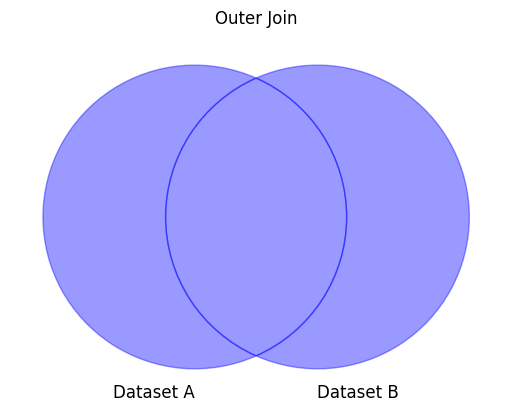

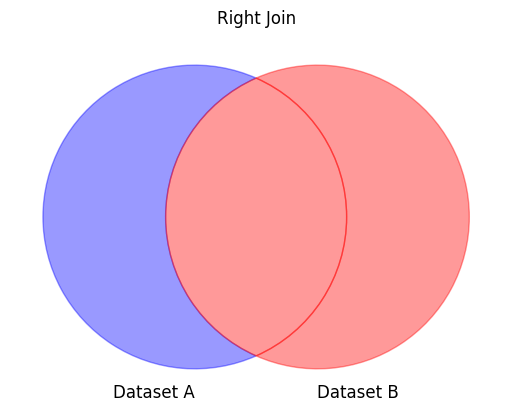

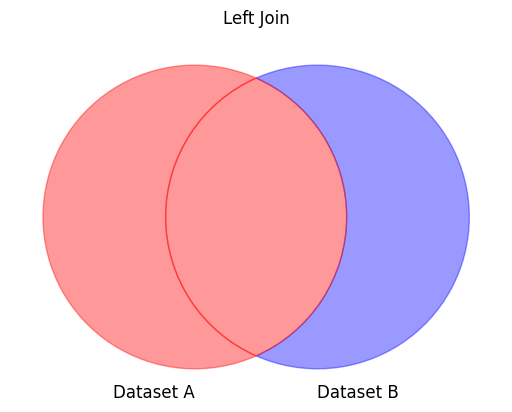

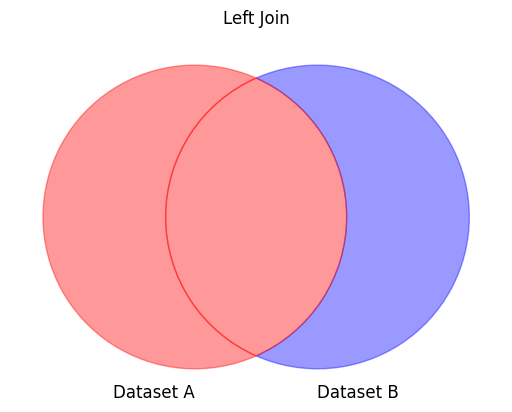

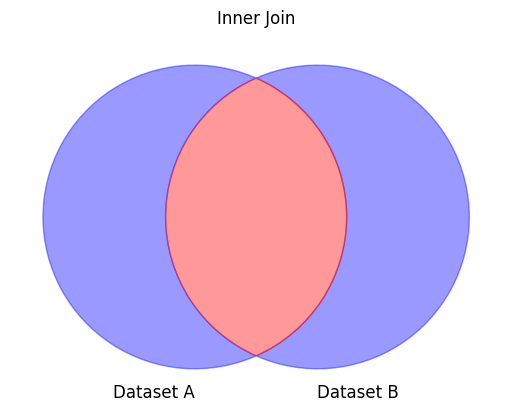

In [ ]:
# @title
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')
# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('blue')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Outer Join')
plt.show()

# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('red')
venn1.get_patch_by_id('01').set_color('red')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Right Join')
plt.show()

venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('red')
venn1.get_patch_by_id('11').set_color('red')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Left Join')
plt.show()

# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('red')
venn1.get_patch_by_id('11').set_color('red')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Left Join')
plt.show()

# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('red')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Inner Join')
plt.show()

In [ ]:
df_bank_clean.merge(df_bank_clean_ej, on='Nombre_Empresa', how='left')

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Fecha_inicio,Ejecutivo
0,Grupo Bimbo,4117589.71,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-07,2017-07-29,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,7008028.47,USD,100001,2017-04-10,2022-02-18,1775,2025-09-07,2018-12-10,Eloisa Salinas Aguilar
2,Liverpool,9918174.32,EUR,100002,2017-04-21,1900-01-01,0,2025-09-07,2025-02-15,Dr. Virginia Pelayo
3,Grupo Lala,1293043.34,USD,100003,2023-11-24,1900-01-01,0,2025-09-07,2022-01-04,Juana Antonia Lira Samaniego
4,Femsa,7128647.73,EUR,100004,2024-10-30,1900-01-01,0,2025-09-07,2018-10-17,Gabino Mariano Laureano Puente
...,...,...,...,...,...,...,...,...,...,...
9995,Bbva México,7649613.74,MXN,109995,2021-01-02,2023-03-01,788,2025-09-07,2025-01-15,Víctor Durán de la Crúz
9996,Soriana,1578366.47,MXN,109996,2017-02-28,2022-02-12,1810,2025-09-07,2020-04-19,Alfonso Natalia Sevilla
9997,Walmart De México,2057031.71,MXN,109997,2020-05-19,1900-01-01,0,2025-09-07,2018-12-10,Eloisa Salinas Aguilar
9998,Grupo Bimbo,6555258.51,MXN,109998,2017-05-13,2019-12-24,955,2025-09-07,2017-07-29,Luis Manuel Ana María Vera Domínguez


### Ejercicios

* ¿Cuánto nos deben por zona?
* ¿Cuánto debe en total bimbo?
* Crea un función para saber lo anterior dependiende del nombre de la empresa
* ¿Cuánto nos deben por divisa?
* Crea un columna condicional con tasas

# Máscaras booleanas y filtros

In [ ]:
# Mascaras booleanas
# query pandas
df_bank_clean.query("Plazo == 10")

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte
3568,Telmex,8431594.50,EUR,103568,2018-10-30,2018-11-09,10,2025-09-07
6390,Bbva México,1786089.57,MXN,106390,2021-12-10,2021-12-20,10,2025-09-07
6623,Pemex,928492.11,MXN,106623,2023-05-06,2023-05-16,10,2025-09-07


# Gráficos directos

<Axes: xlabel='Divisa'>

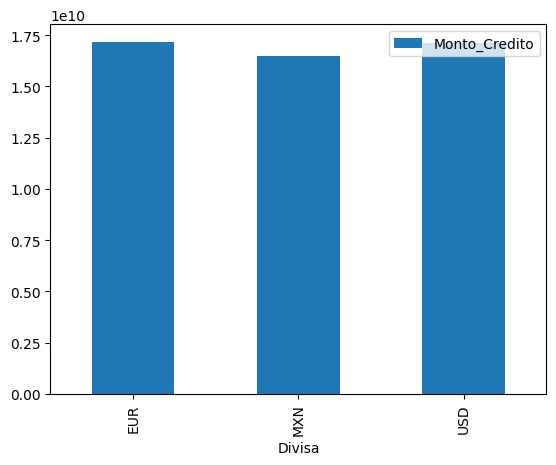

In [ ]:
df_bank_clean[['Divisa', 'Monto_Credito']].groupby("Divisa").sum().reset_index().plot.bar(x='Divisa', y='Monto_Credito')

<Axes: xlabel='Plazo', ylabel='Monto_Credito'>

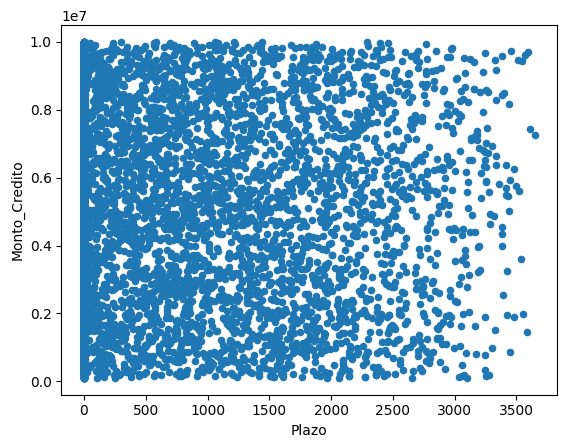

In [ ]:
df_bank_clean.plot.scatter(x='Plazo', y='Monto_Credito')